In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import imagehash
import glob
import csv
from PIL import Image
import os
import sys
from tqdm import tqdm

# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.resnet_v2 import preprocess_input

from keras.preprocessing import image as keras_image

import os
import h5py
import numpy as np
train_dir = 'COMP90086_2021_Project_train/train/'
train_datalabels_dir =  'COMP90086_2021_Project_train/train.csv'


In [2]:
train_datalabels = pd.read_csv(train_datalabels_dir)
train_datalabels

,id,x,y
0,IMG2744_1,-9.380678,3.58272
1,IMG2744_2,-9.380678,3.58272
2,IMG2744_3,-9.380678,3.58272
3,IMG2744_4,-9.380678,3.58272
4,IMG2744_5,-9.380678,3.58272
...,...,...,...
7495,IMG4243_1,-4.680678,35.18272
7496,IMG4243_2,-4.680678,35.18272
7497,IMG4243_3,-4.680678,35.18272
7498,IMG4243_4,-4.680678,35.18272


In [3]:
# train_img_dict = {}
# for img in train_datalabels['id']:
#     train_img_dict[img]=cv2.imread(train_dir+img+'.jpg',cv2.IMREAD_GRAYSCALE)
# train_img_dict
train_img_dir = os.listdir(train_dir)
train_img_dir

['IMG2744_1.jpg',
 'IMG2744_2.jpg',
 'IMG2744_3.jpg',
 'IMG2744_4.jpg',
 'IMG2744_5.jpg',
 'IMG2745_1.jpg',
 'IMG2745_2.jpg',
 'IMG2745_3.jpg',
 'IMG2745_4.jpg',
 'IMG2745_5.jpg',
 'IMG2746_1.jpg',
 'IMG2746_2.jpg',
 'IMG2746_3.jpg',
 'IMG2746_4.jpg',
 'IMG2746_5.jpg',
 'IMG2747_1.jpg',
 'IMG2747_2.jpg',
 'IMG2747_3.jpg',
 'IMG2747_4.jpg',
 'IMG2747_5.jpg',
 'IMG2748_1.jpg',
 'IMG2748_2.jpg',
 'IMG2748_3.jpg',
 'IMG2748_4.jpg',
 'IMG2748_5.jpg',
 'IMG2749_1.jpg',
 'IMG2749_2.jpg',
 'IMG2749_3.jpg',
 'IMG2749_4.jpg',
 'IMG2749_5.jpg',
 'IMG2750_1.jpg',
 'IMG2750_2.jpg',
 'IMG2750_3.jpg',
 'IMG2750_4.jpg',
 'IMG2750_5.jpg',
 'IMG2751_1.jpg',
 'IMG2751_2.jpg',
 'IMG2751_3.jpg',
 'IMG2751_4.jpg',
 'IMG2751_5.jpg',
 'IMG2752_1.jpg',
 'IMG2752_2.jpg',
 'IMG2752_3.jpg',
 'IMG2752_4.jpg',
 'IMG2752_5.jpg',
 'IMG2753_1.jpg',
 'IMG2753_2.jpg',
 'IMG2753_3.jpg',
 'IMG2753_4.jpg',
 'IMG2753_5.jpg',
 'IMG2754_1.jpg',
 'IMG2754_2.jpg',
 'IMG2754_3.jpg',
 'IMG2754_4.jpg',
 'IMG2754_5.jpg',
 'IMG2755_

In [4]:
class FeatureExtractionNet:
    def __init__(self):
        self.input_shape = (680, 490, 3)
        self.model_ResNet152V2 = ResNet152V2(weights='imagenet',
                               input_shape=(self.input_shape[0], self.input_shape[1], self.input_shape[2]),
                               pooling='max', 
                               include_top=False)

    def extract_feature(self, img_path):
        img = keras_image.load_img(img_path, target_size=(self.input_shape[0], self.input_shape[1]))
        img = keras_image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = preprocess_input(img)
        features = self.model_ResNet152V2.predict(img)
        normalized_features = features[0] / np.linalg.norm(features[0])
        return normalized_features
    

In [5]:

output_path = 'models/featureNet_ResNet152V2.h5'

features = []
train_names = []
model = FeatureExtractionNet()

for i, img_path in enumerate(train_img_dir):
    normalized_feature = model.extract_feature(train_dir+img_path)
    train_img_name = os.path.split(img_path)[1]
    features.append(normalized_feature)
    train_names.append(train_img_name)
    print("Extracting feature from {path},{n1}/{n2} images".format(path = img_path,n1 =(i + 1), n2=len(train_img_dir)))

features = np.array(features)

print('----------------------saving feature h5 model------------------------')
h5model = h5py.File(output_path, 'w')
h5model.create_dataset('feature_dataset', data=features)
h5model.create_dataset('training_dataset', data=np.string_(train_names))
h5model.close()

Extracting feature from IMG2744_1.jpg,1/7500 images
Extracting feature from IMG2744_2.jpg,2/7500 images
Extracting feature from IMG2744_3.jpg,3/7500 images
Extracting feature from IMG2744_4.jpg,4/7500 images
Extracting feature from IMG2744_5.jpg,5/7500 images
Extracting feature from IMG2745_1.jpg,6/7500 images
Extracting feature from IMG2745_2.jpg,7/7500 images
Extracting feature from IMG2745_3.jpg,8/7500 images
Extracting feature from IMG2745_4.jpg,9/7500 images
Extracting feature from IMG2745_5.jpg,10/7500 images
Extracting feature from IMG2746_1.jpg,11/7500 images
Extracting feature from IMG2746_2.jpg,12/7500 images
Extracting feature from IMG2746_3.jpg,13/7500 images
Extracting feature from IMG2746_4.jpg,14/7500 images
Extracting feature from IMG2746_5.jpg,15/7500 images
Extracting feature from IMG2747_1.jpg,16/7500 images
Extracting feature from IMG2747_2.jpg,17/7500 images
Extracting feature from IMG2747_3.jpg,18/7500 images
Extracting feature from IMG2747_4.jpg,19/7500 images
Ex

Extracting feature from IMG2774_5.jpg,155/7500 images
Extracting feature from IMG2775_1.jpg,156/7500 images
Extracting feature from IMG2775_2.jpg,157/7500 images
Extracting feature from IMG2775_3.jpg,158/7500 images
Extracting feature from IMG2775_4.jpg,159/7500 images
Extracting feature from IMG2775_5.jpg,160/7500 images
Extracting feature from IMG2776_1.jpg,161/7500 images
Extracting feature from IMG2776_2.jpg,162/7500 images
Extracting feature from IMG2776_3.jpg,163/7500 images
Extracting feature from IMG2776_4.jpg,164/7500 images
Extracting feature from IMG2776_5.jpg,165/7500 images
Extracting feature from IMG2777_1.jpg,166/7500 images
Extracting feature from IMG2777_2.jpg,167/7500 images
Extracting feature from IMG2777_3.jpg,168/7500 images
Extracting feature from IMG2777_4.jpg,169/7500 images
Extracting feature from IMG2777_5.jpg,170/7500 images
Extracting feature from IMG2778_1.jpg,171/7500 images
Extracting feature from IMG2778_2.jpg,172/7500 images
Extracting feature from IMG2

Extracting feature from IMG2805_2.jpg,307/7500 images
Extracting feature from IMG2805_3.jpg,308/7500 images
Extracting feature from IMG2805_4.jpg,309/7500 images
Extracting feature from IMG2805_5.jpg,310/7500 images
Extracting feature from IMG2806_1.jpg,311/7500 images
Extracting feature from IMG2806_2.jpg,312/7500 images
Extracting feature from IMG2806_3.jpg,313/7500 images
Extracting feature from IMG2806_4.jpg,314/7500 images
Extracting feature from IMG2806_5.jpg,315/7500 images
Extracting feature from IMG2807_1.jpg,316/7500 images
Extracting feature from IMG2807_2.jpg,317/7500 images
Extracting feature from IMG2807_3.jpg,318/7500 images
Extracting feature from IMG2807_4.jpg,319/7500 images
Extracting feature from IMG2807_5.jpg,320/7500 images
Extracting feature from IMG2808_1.jpg,321/7500 images
Extracting feature from IMG2808_2.jpg,322/7500 images
Extracting feature from IMG2808_3.jpg,323/7500 images
Extracting feature from IMG2808_4.jpg,324/7500 images
Extracting feature from IMG2

Extracting feature from IMG2835_4.jpg,459/7500 images
Extracting feature from IMG2835_5.jpg,460/7500 images
Extracting feature from IMG2836_1.jpg,461/7500 images
Extracting feature from IMG2836_2.jpg,462/7500 images
Extracting feature from IMG2836_3.jpg,463/7500 images
Extracting feature from IMG2836_4.jpg,464/7500 images
Extracting feature from IMG2836_5.jpg,465/7500 images
Extracting feature from IMG2837_1.jpg,466/7500 images
Extracting feature from IMG2837_2.jpg,467/7500 images
Extracting feature from IMG2837_3.jpg,468/7500 images
Extracting feature from IMG2837_4.jpg,469/7500 images
Extracting feature from IMG2837_5.jpg,470/7500 images
Extracting feature from IMG2838_1.jpg,471/7500 images
Extracting feature from IMG2838_2.jpg,472/7500 images
Extracting feature from IMG2838_3.jpg,473/7500 images
Extracting feature from IMG2838_4.jpg,474/7500 images
Extracting feature from IMG2838_5.jpg,475/7500 images
Extracting feature from IMG2839_1.jpg,476/7500 images
Extracting feature from IMG2

Extracting feature from IMG2866_1.jpg,611/7500 images
Extracting feature from IMG2866_2.jpg,612/7500 images
Extracting feature from IMG2866_3.jpg,613/7500 images
Extracting feature from IMG2866_4.jpg,614/7500 images
Extracting feature from IMG2866_5.jpg,615/7500 images
Extracting feature from IMG2867_1.jpg,616/7500 images
Extracting feature from IMG2867_2.jpg,617/7500 images
Extracting feature from IMG2867_3.jpg,618/7500 images
Extracting feature from IMG2867_4.jpg,619/7500 images
Extracting feature from IMG2867_5.jpg,620/7500 images
Extracting feature from IMG2868_1.jpg,621/7500 images
Extracting feature from IMG2868_2.jpg,622/7500 images
Extracting feature from IMG2868_3.jpg,623/7500 images
Extracting feature from IMG2868_4.jpg,624/7500 images
Extracting feature from IMG2868_5.jpg,625/7500 images
Extracting feature from IMG2869_1.jpg,626/7500 images
Extracting feature from IMG2869_2.jpg,627/7500 images
Extracting feature from IMG2869_3.jpg,628/7500 images
Extracting feature from IMG2

Extracting feature from IMG2896_3.jpg,763/7500 images
Extracting feature from IMG2896_4.jpg,764/7500 images
Extracting feature from IMG2896_5.jpg,765/7500 images
Extracting feature from IMG2897_1.jpg,766/7500 images
Extracting feature from IMG2897_2.jpg,767/7500 images
Extracting feature from IMG2897_3.jpg,768/7500 images
Extracting feature from IMG2897_4.jpg,769/7500 images
Extracting feature from IMG2897_5.jpg,770/7500 images
Extracting feature from IMG2898_1.jpg,771/7500 images
Extracting feature from IMG2898_2.jpg,772/7500 images
Extracting feature from IMG2898_3.jpg,773/7500 images
Extracting feature from IMG2898_4.jpg,774/7500 images
Extracting feature from IMG2898_5.jpg,775/7500 images
Extracting feature from IMG2899_1.jpg,776/7500 images
Extracting feature from IMG2899_2.jpg,777/7500 images
Extracting feature from IMG2899_3.jpg,778/7500 images
Extracting feature from IMG2899_4.jpg,779/7500 images
Extracting feature from IMG2899_5.jpg,780/7500 images
Extracting feature from IMG2

Extracting feature from IMG2926_5.jpg,915/7500 images
Extracting feature from IMG2927_1.jpg,916/7500 images
Extracting feature from IMG2927_2.jpg,917/7500 images
Extracting feature from IMG2927_3.jpg,918/7500 images
Extracting feature from IMG2927_4.jpg,919/7500 images
Extracting feature from IMG2927_5.jpg,920/7500 images
Extracting feature from IMG2928_1.jpg,921/7500 images
Extracting feature from IMG2928_2.jpg,922/7500 images
Extracting feature from IMG2928_3.jpg,923/7500 images
Extracting feature from IMG2928_4.jpg,924/7500 images
Extracting feature from IMG2928_5.jpg,925/7500 images
Extracting feature from IMG2929_1.jpg,926/7500 images
Extracting feature from IMG2929_2.jpg,927/7500 images
Extracting feature from IMG2929_3.jpg,928/7500 images
Extracting feature from IMG2929_4.jpg,929/7500 images
Extracting feature from IMG2929_5.jpg,930/7500 images
Extracting feature from IMG2930_1.jpg,931/7500 images
Extracting feature from IMG2930_2.jpg,932/7500 images
Extracting feature from IMG2

Extracting feature from IMG2957_1.jpg,1066/7500 images
Extracting feature from IMG2957_2.jpg,1067/7500 images
Extracting feature from IMG2957_3.jpg,1068/7500 images
Extracting feature from IMG2957_4.jpg,1069/7500 images
Extracting feature from IMG2957_5.jpg,1070/7500 images
Extracting feature from IMG2958_1.jpg,1071/7500 images
Extracting feature from IMG2958_2.jpg,1072/7500 images
Extracting feature from IMG2958_3.jpg,1073/7500 images
Extracting feature from IMG2958_4.jpg,1074/7500 images
Extracting feature from IMG2958_5.jpg,1075/7500 images
Extracting feature from IMG2959_1.jpg,1076/7500 images
Extracting feature from IMG2959_2.jpg,1077/7500 images
Extracting feature from IMG2959_3.jpg,1078/7500 images
Extracting feature from IMG2959_4.jpg,1079/7500 images
Extracting feature from IMG2959_5.jpg,1080/7500 images
Extracting feature from IMG2960_1.jpg,1081/7500 images
Extracting feature from IMG2960_2.jpg,1082/7500 images
Extracting feature from IMG2960_3.jpg,1083/7500 images
Extracting

Extracting feature from IMG2986_5.jpg,1215/7500 images
Extracting feature from IMG2987_1.jpg,1216/7500 images
Extracting feature from IMG2987_2.jpg,1217/7500 images
Extracting feature from IMG2987_3.jpg,1218/7500 images
Extracting feature from IMG2987_4.jpg,1219/7500 images
Extracting feature from IMG2987_5.jpg,1220/7500 images
Extracting feature from IMG2988_1.jpg,1221/7500 images
Extracting feature from IMG2988_2.jpg,1222/7500 images
Extracting feature from IMG2988_3.jpg,1223/7500 images
Extracting feature from IMG2988_4.jpg,1224/7500 images
Extracting feature from IMG2988_5.jpg,1225/7500 images
Extracting feature from IMG2989_1.jpg,1226/7500 images
Extracting feature from IMG2989_2.jpg,1227/7500 images
Extracting feature from IMG2989_3.jpg,1228/7500 images
Extracting feature from IMG2989_4.jpg,1229/7500 images
Extracting feature from IMG2989_5.jpg,1230/7500 images
Extracting feature from IMG2990_1.jpg,1231/7500 images
Extracting feature from IMG2990_2.jpg,1232/7500 images
Extracting

Extracting feature from IMG3016_4.jpg,1364/7500 images
Extracting feature from IMG3016_5.jpg,1365/7500 images
Extracting feature from IMG3017_1.jpg,1366/7500 images
Extracting feature from IMG3017_2.jpg,1367/7500 images
Extracting feature from IMG3017_3.jpg,1368/7500 images
Extracting feature from IMG3017_4.jpg,1369/7500 images
Extracting feature from IMG3017_5.jpg,1370/7500 images
Extracting feature from IMG3018_1.jpg,1371/7500 images
Extracting feature from IMG3018_2.jpg,1372/7500 images
Extracting feature from IMG3018_3.jpg,1373/7500 images
Extracting feature from IMG3018_4.jpg,1374/7500 images
Extracting feature from IMG3018_5.jpg,1375/7500 images
Extracting feature from IMG3019_1.jpg,1376/7500 images
Extracting feature from IMG3019_2.jpg,1377/7500 images
Extracting feature from IMG3019_3.jpg,1378/7500 images
Extracting feature from IMG3019_4.jpg,1379/7500 images
Extracting feature from IMG3019_5.jpg,1380/7500 images
Extracting feature from IMG3020_1.jpg,1381/7500 images
Extracting

Extracting feature from IMG3046_3.jpg,1513/7500 images
Extracting feature from IMG3046_4.jpg,1514/7500 images
Extracting feature from IMG3046_5.jpg,1515/7500 images
Extracting feature from IMG3047_1.jpg,1516/7500 images
Extracting feature from IMG3047_2.jpg,1517/7500 images
Extracting feature from IMG3047_3.jpg,1518/7500 images
Extracting feature from IMG3047_4.jpg,1519/7500 images
Extracting feature from IMG3047_5.jpg,1520/7500 images
Extracting feature from IMG3048_1.jpg,1521/7500 images
Extracting feature from IMG3048_2.jpg,1522/7500 images
Extracting feature from IMG3048_3.jpg,1523/7500 images
Extracting feature from IMG3048_4.jpg,1524/7500 images
Extracting feature from IMG3048_5.jpg,1525/7500 images
Extracting feature from IMG3049_1.jpg,1526/7500 images
Extracting feature from IMG3049_2.jpg,1527/7500 images
Extracting feature from IMG3049_3.jpg,1528/7500 images
Extracting feature from IMG3049_4.jpg,1529/7500 images
Extracting feature from IMG3049_5.jpg,1530/7500 images
Extracting

Extracting feature from IMG3076_2.jpg,1662/7500 images
Extracting feature from IMG3076_3.jpg,1663/7500 images
Extracting feature from IMG3076_4.jpg,1664/7500 images
Extracting feature from IMG3076_5.jpg,1665/7500 images
Extracting feature from IMG3077_1.jpg,1666/7500 images
Extracting feature from IMG3077_2.jpg,1667/7500 images
Extracting feature from IMG3077_3.jpg,1668/7500 images
Extracting feature from IMG3077_4.jpg,1669/7500 images
Extracting feature from IMG3077_5.jpg,1670/7500 images
Extracting feature from IMG3078_1.jpg,1671/7500 images
Extracting feature from IMG3078_2.jpg,1672/7500 images
Extracting feature from IMG3078_3.jpg,1673/7500 images
Extracting feature from IMG3078_4.jpg,1674/7500 images
Extracting feature from IMG3078_5.jpg,1675/7500 images
Extracting feature from IMG3079_1.jpg,1676/7500 images
Extracting feature from IMG3079_2.jpg,1677/7500 images
Extracting feature from IMG3079_3.jpg,1678/7500 images
Extracting feature from IMG3079_4.jpg,1679/7500 images
Extracting

Extracting feature from IMG3106_1.jpg,1811/7500 images
Extracting feature from IMG3106_2.jpg,1812/7500 images
Extracting feature from IMG3106_3.jpg,1813/7500 images
Extracting feature from IMG3106_4.jpg,1814/7500 images
Extracting feature from IMG3106_5.jpg,1815/7500 images
Extracting feature from IMG3107_1.jpg,1816/7500 images
Extracting feature from IMG3107_2.jpg,1817/7500 images
Extracting feature from IMG3107_3.jpg,1818/7500 images
Extracting feature from IMG3107_4.jpg,1819/7500 images
Extracting feature from IMG3107_5.jpg,1820/7500 images
Extracting feature from IMG3108_1.jpg,1821/7500 images
Extracting feature from IMG3108_2.jpg,1822/7500 images
Extracting feature from IMG3108_3.jpg,1823/7500 images
Extracting feature from IMG3108_4.jpg,1824/7500 images
Extracting feature from IMG3108_5.jpg,1825/7500 images
Extracting feature from IMG3109_1.jpg,1826/7500 images
Extracting feature from IMG3109_2.jpg,1827/7500 images
Extracting feature from IMG3109_3.jpg,1828/7500 images
Extracting

Extracting feature from IMG3135_5.jpg,1960/7500 images
Extracting feature from IMG3136_1.jpg,1961/7500 images
Extracting feature from IMG3136_2.jpg,1962/7500 images
Extracting feature from IMG3136_3.jpg,1963/7500 images
Extracting feature from IMG3136_4.jpg,1964/7500 images
Extracting feature from IMG3136_5.jpg,1965/7500 images
Extracting feature from IMG3137_1.jpg,1966/7500 images
Extracting feature from IMG3137_2.jpg,1967/7500 images
Extracting feature from IMG3137_3.jpg,1968/7500 images
Extracting feature from IMG3137_4.jpg,1969/7500 images
Extracting feature from IMG3137_5.jpg,1970/7500 images
Extracting feature from IMG3138_1.jpg,1971/7500 images
Extracting feature from IMG3138_2.jpg,1972/7500 images
Extracting feature from IMG3138_3.jpg,1973/7500 images
Extracting feature from IMG3138_4.jpg,1974/7500 images
Extracting feature from IMG3138_5.jpg,1975/7500 images
Extracting feature from IMG3139_1.jpg,1976/7500 images
Extracting feature from IMG3139_2.jpg,1977/7500 images
Extracting

Extracting feature from IMG3165_4.jpg,2109/7500 images
Extracting feature from IMG3165_5.jpg,2110/7500 images
Extracting feature from IMG3166_1.jpg,2111/7500 images
Extracting feature from IMG3166_2.jpg,2112/7500 images
Extracting feature from IMG3166_3.jpg,2113/7500 images
Extracting feature from IMG3166_4.jpg,2114/7500 images
Extracting feature from IMG3166_5.jpg,2115/7500 images
Extracting feature from IMG3167_1.jpg,2116/7500 images
Extracting feature from IMG3167_2.jpg,2117/7500 images
Extracting feature from IMG3167_3.jpg,2118/7500 images
Extracting feature from IMG3167_4.jpg,2119/7500 images
Extracting feature from IMG3167_5.jpg,2120/7500 images
Extracting feature from IMG3168_1.jpg,2121/7500 images
Extracting feature from IMG3168_2.jpg,2122/7500 images
Extracting feature from IMG3168_3.jpg,2123/7500 images
Extracting feature from IMG3168_4.jpg,2124/7500 images
Extracting feature from IMG3168_5.jpg,2125/7500 images
Extracting feature from IMG3169_1.jpg,2126/7500 images
Extracting

Extracting feature from IMG3195_3.jpg,2258/7500 images
Extracting feature from IMG3195_4.jpg,2259/7500 images
Extracting feature from IMG3195_5.jpg,2260/7500 images
Extracting feature from IMG3196_1.jpg,2261/7500 images
Extracting feature from IMG3196_2.jpg,2262/7500 images
Extracting feature from IMG3196_3.jpg,2263/7500 images
Extracting feature from IMG3196_4.jpg,2264/7500 images
Extracting feature from IMG3196_5.jpg,2265/7500 images
Extracting feature from IMG3197_1.jpg,2266/7500 images
Extracting feature from IMG3197_2.jpg,2267/7500 images
Extracting feature from IMG3197_3.jpg,2268/7500 images
Extracting feature from IMG3197_4.jpg,2269/7500 images
Extracting feature from IMG3197_5.jpg,2270/7500 images
Extracting feature from IMG3198_1.jpg,2271/7500 images
Extracting feature from IMG3198_2.jpg,2272/7500 images
Extracting feature from IMG3198_3.jpg,2273/7500 images
Extracting feature from IMG3198_4.jpg,2274/7500 images
Extracting feature from IMG3198_5.jpg,2275/7500 images
Extracting

Extracting feature from IMG3225_2.jpg,2407/7500 images
Extracting feature from IMG3225_3.jpg,2408/7500 images
Extracting feature from IMG3225_4.jpg,2409/7500 images
Extracting feature from IMG3225_5.jpg,2410/7500 images
Extracting feature from IMG3226_1.jpg,2411/7500 images
Extracting feature from IMG3226_2.jpg,2412/7500 images
Extracting feature from IMG3226_3.jpg,2413/7500 images
Extracting feature from IMG3226_4.jpg,2414/7500 images
Extracting feature from IMG3226_5.jpg,2415/7500 images
Extracting feature from IMG3227_1.jpg,2416/7500 images
Extracting feature from IMG3227_2.jpg,2417/7500 images
Extracting feature from IMG3227_3.jpg,2418/7500 images
Extracting feature from IMG3227_4.jpg,2419/7500 images
Extracting feature from IMG3227_5.jpg,2420/7500 images
Extracting feature from IMG3228_1.jpg,2421/7500 images
Extracting feature from IMG3228_2.jpg,2422/7500 images
Extracting feature from IMG3228_3.jpg,2423/7500 images
Extracting feature from IMG3228_4.jpg,2424/7500 images
Extracting

Extracting feature from IMG3255_1.jpg,2556/7500 images
Extracting feature from IMG3255_2.jpg,2557/7500 images
Extracting feature from IMG3255_3.jpg,2558/7500 images
Extracting feature from IMG3255_4.jpg,2559/7500 images
Extracting feature from IMG3255_5.jpg,2560/7500 images
Extracting feature from IMG3256_1.jpg,2561/7500 images
Extracting feature from IMG3256_2.jpg,2562/7500 images
Extracting feature from IMG3256_3.jpg,2563/7500 images
Extracting feature from IMG3256_4.jpg,2564/7500 images
Extracting feature from IMG3256_5.jpg,2565/7500 images
Extracting feature from IMG3257_1.jpg,2566/7500 images
Extracting feature from IMG3257_2.jpg,2567/7500 images
Extracting feature from IMG3257_3.jpg,2568/7500 images
Extracting feature from IMG3257_4.jpg,2569/7500 images
Extracting feature from IMG3257_5.jpg,2570/7500 images
Extracting feature from IMG3258_1.jpg,2571/7500 images
Extracting feature from IMG3258_2.jpg,2572/7500 images
Extracting feature from IMG3258_3.jpg,2573/7500 images
Extracting

Extracting feature from IMG3284_5.jpg,2705/7500 images
Extracting feature from IMG3285_1.jpg,2706/7500 images
Extracting feature from IMG3285_2.jpg,2707/7500 images
Extracting feature from IMG3285_3.jpg,2708/7500 images
Extracting feature from IMG3285_4.jpg,2709/7500 images
Extracting feature from IMG3285_5.jpg,2710/7500 images
Extracting feature from IMG3286_1.jpg,2711/7500 images
Extracting feature from IMG3286_2.jpg,2712/7500 images
Extracting feature from IMG3286_3.jpg,2713/7500 images
Extracting feature from IMG3286_4.jpg,2714/7500 images
Extracting feature from IMG3286_5.jpg,2715/7500 images
Extracting feature from IMG3287_1.jpg,2716/7500 images
Extracting feature from IMG3287_2.jpg,2717/7500 images
Extracting feature from IMG3287_3.jpg,2718/7500 images
Extracting feature from IMG3287_4.jpg,2719/7500 images
Extracting feature from IMG3287_5.jpg,2720/7500 images
Extracting feature from IMG3288_1.jpg,2721/7500 images
Extracting feature from IMG3288_2.jpg,2722/7500 images
Extracting

Extracting feature from IMG3314_4.jpg,2854/7500 images
Extracting feature from IMG3314_5.jpg,2855/7500 images
Extracting feature from IMG3315_1.jpg,2856/7500 images
Extracting feature from IMG3315_2.jpg,2857/7500 images
Extracting feature from IMG3315_3.jpg,2858/7500 images
Extracting feature from IMG3315_4.jpg,2859/7500 images
Extracting feature from IMG3315_5.jpg,2860/7500 images
Extracting feature from IMG3316_1.jpg,2861/7500 images
Extracting feature from IMG3316_2.jpg,2862/7500 images
Extracting feature from IMG3316_3.jpg,2863/7500 images
Extracting feature from IMG3316_4.jpg,2864/7500 images
Extracting feature from IMG3316_5.jpg,2865/7500 images
Extracting feature from IMG3317_1.jpg,2866/7500 images
Extracting feature from IMG3317_2.jpg,2867/7500 images
Extracting feature from IMG3317_3.jpg,2868/7500 images
Extracting feature from IMG3317_4.jpg,2869/7500 images
Extracting feature from IMG3317_5.jpg,2870/7500 images
Extracting feature from IMG3318_1.jpg,2871/7500 images
Extracting

Extracting feature from IMG3344_3.jpg,3003/7500 images
Extracting feature from IMG3344_4.jpg,3004/7500 images
Extracting feature from IMG3344_5.jpg,3005/7500 images
Extracting feature from IMG3345_1.jpg,3006/7500 images
Extracting feature from IMG3345_2.jpg,3007/7500 images
Extracting feature from IMG3345_3.jpg,3008/7500 images
Extracting feature from IMG3345_4.jpg,3009/7500 images
Extracting feature from IMG3345_5.jpg,3010/7500 images
Extracting feature from IMG3346_1.jpg,3011/7500 images
Extracting feature from IMG3346_2.jpg,3012/7500 images
Extracting feature from IMG3346_3.jpg,3013/7500 images
Extracting feature from IMG3346_4.jpg,3014/7500 images
Extracting feature from IMG3346_5.jpg,3015/7500 images
Extracting feature from IMG3347_1.jpg,3016/7500 images
Extracting feature from IMG3347_2.jpg,3017/7500 images
Extracting feature from IMG3347_3.jpg,3018/7500 images
Extracting feature from IMG3347_4.jpg,3019/7500 images
Extracting feature from IMG3347_5.jpg,3020/7500 images
Extracting

Extracting feature from IMG3374_2.jpg,3152/7500 images
Extracting feature from IMG3374_3.jpg,3153/7500 images
Extracting feature from IMG3374_4.jpg,3154/7500 images
Extracting feature from IMG3374_5.jpg,3155/7500 images
Extracting feature from IMG3375_1.jpg,3156/7500 images
Extracting feature from IMG3375_2.jpg,3157/7500 images
Extracting feature from IMG3375_3.jpg,3158/7500 images
Extracting feature from IMG3375_4.jpg,3159/7500 images
Extracting feature from IMG3375_5.jpg,3160/7500 images
Extracting feature from IMG3376_1.jpg,3161/7500 images
Extracting feature from IMG3376_2.jpg,3162/7500 images
Extracting feature from IMG3376_3.jpg,3163/7500 images
Extracting feature from IMG3376_4.jpg,3164/7500 images
Extracting feature from IMG3376_5.jpg,3165/7500 images
Extracting feature from IMG3377_1.jpg,3166/7500 images
Extracting feature from IMG3377_2.jpg,3167/7500 images
Extracting feature from IMG3377_3.jpg,3168/7500 images
Extracting feature from IMG3377_4.jpg,3169/7500 images
Extracting

Extracting feature from IMG3404_1.jpg,3301/7500 images
Extracting feature from IMG3404_2.jpg,3302/7500 images
Extracting feature from IMG3404_3.jpg,3303/7500 images
Extracting feature from IMG3404_4.jpg,3304/7500 images
Extracting feature from IMG3404_5.jpg,3305/7500 images
Extracting feature from IMG3405_1.jpg,3306/7500 images
Extracting feature from IMG3405_2.jpg,3307/7500 images
Extracting feature from IMG3405_3.jpg,3308/7500 images
Extracting feature from IMG3405_4.jpg,3309/7500 images
Extracting feature from IMG3405_5.jpg,3310/7500 images
Extracting feature from IMG3406_1.jpg,3311/7500 images
Extracting feature from IMG3406_2.jpg,3312/7500 images
Extracting feature from IMG3406_3.jpg,3313/7500 images
Extracting feature from IMG3406_4.jpg,3314/7500 images
Extracting feature from IMG3406_5.jpg,3315/7500 images
Extracting feature from IMG3407_1.jpg,3316/7500 images
Extracting feature from IMG3407_2.jpg,3317/7500 images
Extracting feature from IMG3407_3.jpg,3318/7500 images
Extracting

Extracting feature from IMG3433_5.jpg,3450/7500 images
Extracting feature from IMG3434_1.jpg,3451/7500 images
Extracting feature from IMG3434_2.jpg,3452/7500 images
Extracting feature from IMG3434_3.jpg,3453/7500 images
Extracting feature from IMG3434_4.jpg,3454/7500 images
Extracting feature from IMG3434_5.jpg,3455/7500 images
Extracting feature from IMG3435_1.jpg,3456/7500 images
Extracting feature from IMG3435_2.jpg,3457/7500 images
Extracting feature from IMG3435_3.jpg,3458/7500 images
Extracting feature from IMG3435_4.jpg,3459/7500 images
Extracting feature from IMG3435_5.jpg,3460/7500 images
Extracting feature from IMG3436_1.jpg,3461/7500 images
Extracting feature from IMG3436_2.jpg,3462/7500 images
Extracting feature from IMG3436_3.jpg,3463/7500 images
Extracting feature from IMG3436_4.jpg,3464/7500 images
Extracting feature from IMG3436_5.jpg,3465/7500 images
Extracting feature from IMG3437_1.jpg,3466/7500 images
Extracting feature from IMG3437_2.jpg,3467/7500 images
Extracting

Extracting feature from IMG3463_4.jpg,3599/7500 images
Extracting feature from IMG3463_5.jpg,3600/7500 images
Extracting feature from IMG3464_1.jpg,3601/7500 images
Extracting feature from IMG3464_2.jpg,3602/7500 images
Extracting feature from IMG3464_3.jpg,3603/7500 images
Extracting feature from IMG3464_4.jpg,3604/7500 images
Extracting feature from IMG3464_5.jpg,3605/7500 images
Extracting feature from IMG3465_1.jpg,3606/7500 images
Extracting feature from IMG3465_2.jpg,3607/7500 images
Extracting feature from IMG3465_3.jpg,3608/7500 images
Extracting feature from IMG3465_4.jpg,3609/7500 images
Extracting feature from IMG3465_5.jpg,3610/7500 images
Extracting feature from IMG3466_1.jpg,3611/7500 images
Extracting feature from IMG3466_2.jpg,3612/7500 images
Extracting feature from IMG3466_3.jpg,3613/7500 images
Extracting feature from IMG3466_4.jpg,3614/7500 images
Extracting feature from IMG3466_5.jpg,3615/7500 images
Extracting feature from IMG3467_1.jpg,3616/7500 images
Extracting

Extracting feature from IMG3493_3.jpg,3748/7500 images
Extracting feature from IMG3493_4.jpg,3749/7500 images
Extracting feature from IMG3493_5.jpg,3750/7500 images
Extracting feature from IMG3494_1.jpg,3751/7500 images
Extracting feature from IMG3494_2.jpg,3752/7500 images
Extracting feature from IMG3494_3.jpg,3753/7500 images
Extracting feature from IMG3494_4.jpg,3754/7500 images
Extracting feature from IMG3494_5.jpg,3755/7500 images
Extracting feature from IMG3495_1.jpg,3756/7500 images
Extracting feature from IMG3495_2.jpg,3757/7500 images
Extracting feature from IMG3495_3.jpg,3758/7500 images
Extracting feature from IMG3495_4.jpg,3759/7500 images
Extracting feature from IMG3495_5.jpg,3760/7500 images
Extracting feature from IMG3496_1.jpg,3761/7500 images
Extracting feature from IMG3496_2.jpg,3762/7500 images
Extracting feature from IMG3496_3.jpg,3763/7500 images
Extracting feature from IMG3496_4.jpg,3764/7500 images
Extracting feature from IMG3496_5.jpg,3765/7500 images
Extracting

Extracting feature from IMG3523_2.jpg,3897/7500 images
Extracting feature from IMG3523_3.jpg,3898/7500 images
Extracting feature from IMG3523_4.jpg,3899/7500 images
Extracting feature from IMG3523_5.jpg,3900/7500 images
Extracting feature from IMG3524_1.jpg,3901/7500 images
Extracting feature from IMG3524_2.jpg,3902/7500 images
Extracting feature from IMG3524_3.jpg,3903/7500 images
Extracting feature from IMG3524_4.jpg,3904/7500 images
Extracting feature from IMG3524_5.jpg,3905/7500 images
Extracting feature from IMG3525_1.jpg,3906/7500 images
Extracting feature from IMG3525_2.jpg,3907/7500 images
Extracting feature from IMG3525_3.jpg,3908/7500 images
Extracting feature from IMG3525_4.jpg,3909/7500 images
Extracting feature from IMG3525_5.jpg,3910/7500 images
Extracting feature from IMG3526_1.jpg,3911/7500 images
Extracting feature from IMG3526_2.jpg,3912/7500 images
Extracting feature from IMG3526_3.jpg,3913/7500 images
Extracting feature from IMG3526_4.jpg,3914/7500 images
Extracting

Extracting feature from IMG3553_1.jpg,4046/7500 images
Extracting feature from IMG3553_2.jpg,4047/7500 images
Extracting feature from IMG3553_3.jpg,4048/7500 images
Extracting feature from IMG3553_4.jpg,4049/7500 images
Extracting feature from IMG3553_5.jpg,4050/7500 images
Extracting feature from IMG3554_1.jpg,4051/7500 images
Extracting feature from IMG3554_2.jpg,4052/7500 images
Extracting feature from IMG3554_3.jpg,4053/7500 images
Extracting feature from IMG3554_4.jpg,4054/7500 images
Extracting feature from IMG3554_5.jpg,4055/7500 images
Extracting feature from IMG3555_1.jpg,4056/7500 images
Extracting feature from IMG3555_2.jpg,4057/7500 images
Extracting feature from IMG3555_3.jpg,4058/7500 images
Extracting feature from IMG3555_4.jpg,4059/7500 images
Extracting feature from IMG3555_5.jpg,4060/7500 images
Extracting feature from IMG3556_1.jpg,4061/7500 images
Extracting feature from IMG3556_2.jpg,4062/7500 images
Extracting feature from IMG3556_3.jpg,4063/7500 images
Extracting

Extracting feature from IMG3582_5.jpg,4195/7500 images
Extracting feature from IMG3583_1.jpg,4196/7500 images
Extracting feature from IMG3583_2.jpg,4197/7500 images
Extracting feature from IMG3583_3.jpg,4198/7500 images
Extracting feature from IMG3583_4.jpg,4199/7500 images
Extracting feature from IMG3583_5.jpg,4200/7500 images
Extracting feature from IMG3584_1.jpg,4201/7500 images
Extracting feature from IMG3584_2.jpg,4202/7500 images
Extracting feature from IMG3584_3.jpg,4203/7500 images
Extracting feature from IMG3584_4.jpg,4204/7500 images
Extracting feature from IMG3584_5.jpg,4205/7500 images
Extracting feature from IMG3585_1.jpg,4206/7500 images
Extracting feature from IMG3585_2.jpg,4207/7500 images
Extracting feature from IMG3585_3.jpg,4208/7500 images
Extracting feature from IMG3585_4.jpg,4209/7500 images
Extracting feature from IMG3585_5.jpg,4210/7500 images
Extracting feature from IMG3586_1.jpg,4211/7500 images
Extracting feature from IMG3586_2.jpg,4212/7500 images
Extracting

Extracting feature from IMG3612_4.jpg,4344/7500 images
Extracting feature from IMG3612_5.jpg,4345/7500 images
Extracting feature from IMG3613_1.jpg,4346/7500 images
Extracting feature from IMG3613_2.jpg,4347/7500 images
Extracting feature from IMG3613_3.jpg,4348/7500 images
Extracting feature from IMG3613_4.jpg,4349/7500 images
Extracting feature from IMG3613_5.jpg,4350/7500 images
Extracting feature from IMG3614_1.jpg,4351/7500 images
Extracting feature from IMG3614_2.jpg,4352/7500 images
Extracting feature from IMG3614_3.jpg,4353/7500 images
Extracting feature from IMG3614_4.jpg,4354/7500 images
Extracting feature from IMG3614_5.jpg,4355/7500 images
Extracting feature from IMG3615_1.jpg,4356/7500 images
Extracting feature from IMG3615_2.jpg,4357/7500 images
Extracting feature from IMG3615_3.jpg,4358/7500 images
Extracting feature from IMG3615_4.jpg,4359/7500 images
Extracting feature from IMG3615_5.jpg,4360/7500 images
Extracting feature from IMG3616_1.jpg,4361/7500 images
Extracting

Extracting feature from IMG3642_3.jpg,4493/7500 images
Extracting feature from IMG3642_4.jpg,4494/7500 images
Extracting feature from IMG3642_5.jpg,4495/7500 images
Extracting feature from IMG3643_1.jpg,4496/7500 images
Extracting feature from IMG3643_2.jpg,4497/7500 images
Extracting feature from IMG3643_3.jpg,4498/7500 images
Extracting feature from IMG3643_4.jpg,4499/7500 images
Extracting feature from IMG3643_5.jpg,4500/7500 images
Extracting feature from IMG3644_1.jpg,4501/7500 images
Extracting feature from IMG3644_2.jpg,4502/7500 images
Extracting feature from IMG3644_3.jpg,4503/7500 images
Extracting feature from IMG3644_4.jpg,4504/7500 images
Extracting feature from IMG3644_5.jpg,4505/7500 images
Extracting feature from IMG3645_1.jpg,4506/7500 images
Extracting feature from IMG3645_2.jpg,4507/7500 images
Extracting feature from IMG3645_3.jpg,4508/7500 images
Extracting feature from IMG3645_4.jpg,4509/7500 images
Extracting feature from IMG3645_5.jpg,4510/7500 images
Extracting

Extracting feature from IMG3672_2.jpg,4642/7500 images
Extracting feature from IMG3672_3.jpg,4643/7500 images
Extracting feature from IMG3672_4.jpg,4644/7500 images
Extracting feature from IMG3672_5.jpg,4645/7500 images
Extracting feature from IMG3673_1.jpg,4646/7500 images
Extracting feature from IMG3673_2.jpg,4647/7500 images
Extracting feature from IMG3673_3.jpg,4648/7500 images
Extracting feature from IMG3673_4.jpg,4649/7500 images
Extracting feature from IMG3673_5.jpg,4650/7500 images
Extracting feature from IMG3674_1.jpg,4651/7500 images
Extracting feature from IMG3674_2.jpg,4652/7500 images
Extracting feature from IMG3674_3.jpg,4653/7500 images
Extracting feature from IMG3674_4.jpg,4654/7500 images
Extracting feature from IMG3674_5.jpg,4655/7500 images
Extracting feature from IMG3675_1.jpg,4656/7500 images
Extracting feature from IMG3675_2.jpg,4657/7500 images
Extracting feature from IMG3675_3.jpg,4658/7500 images
Extracting feature from IMG3675_4.jpg,4659/7500 images
Extracting

Extracting feature from IMG3702_1.jpg,4791/7500 images
Extracting feature from IMG3702_2.jpg,4792/7500 images
Extracting feature from IMG3702_3.jpg,4793/7500 images
Extracting feature from IMG3702_4.jpg,4794/7500 images
Extracting feature from IMG3702_5.jpg,4795/7500 images
Extracting feature from IMG3703_1.jpg,4796/7500 images
Extracting feature from IMG3703_2.jpg,4797/7500 images
Extracting feature from IMG3703_3.jpg,4798/7500 images
Extracting feature from IMG3703_4.jpg,4799/7500 images
Extracting feature from IMG3703_5.jpg,4800/7500 images
Extracting feature from IMG3704_1.jpg,4801/7500 images
Extracting feature from IMG3704_2.jpg,4802/7500 images
Extracting feature from IMG3704_3.jpg,4803/7500 images
Extracting feature from IMG3704_4.jpg,4804/7500 images
Extracting feature from IMG3704_5.jpg,4805/7500 images
Extracting feature from IMG3705_1.jpg,4806/7500 images
Extracting feature from IMG3705_2.jpg,4807/7500 images
Extracting feature from IMG3705_3.jpg,4808/7500 images
Extracting

Extracting feature from IMG3731_5.jpg,4940/7500 images
Extracting feature from IMG3732_1.jpg,4941/7500 images
Extracting feature from IMG3732_2.jpg,4942/7500 images
Extracting feature from IMG3732_3.jpg,4943/7500 images
Extracting feature from IMG3732_4.jpg,4944/7500 images
Extracting feature from IMG3732_5.jpg,4945/7500 images
Extracting feature from IMG3733_1.jpg,4946/7500 images
Extracting feature from IMG3733_2.jpg,4947/7500 images
Extracting feature from IMG3733_3.jpg,4948/7500 images
Extracting feature from IMG3733_4.jpg,4949/7500 images
Extracting feature from IMG3733_5.jpg,4950/7500 images
Extracting feature from IMG3734_1.jpg,4951/7500 images
Extracting feature from IMG3734_2.jpg,4952/7500 images
Extracting feature from IMG3734_3.jpg,4953/7500 images
Extracting feature from IMG3734_4.jpg,4954/7500 images
Extracting feature from IMG3734_5.jpg,4955/7500 images
Extracting feature from IMG3735_1.jpg,4956/7500 images
Extracting feature from IMG3735_2.jpg,4957/7500 images
Extracting

Extracting feature from IMG3761_4.jpg,5089/7500 images
Extracting feature from IMG3761_5.jpg,5090/7500 images
Extracting feature from IMG3762_1.jpg,5091/7500 images
Extracting feature from IMG3762_2.jpg,5092/7500 images
Extracting feature from IMG3762_3.jpg,5093/7500 images
Extracting feature from IMG3762_4.jpg,5094/7500 images
Extracting feature from IMG3762_5.jpg,5095/7500 images
Extracting feature from IMG3763_1.jpg,5096/7500 images
Extracting feature from IMG3763_2.jpg,5097/7500 images
Extracting feature from IMG3763_3.jpg,5098/7500 images
Extracting feature from IMG3763_4.jpg,5099/7500 images
Extracting feature from IMG3763_5.jpg,5100/7500 images
Extracting feature from IMG3764_1.jpg,5101/7500 images
Extracting feature from IMG3764_2.jpg,5102/7500 images
Extracting feature from IMG3764_3.jpg,5103/7500 images
Extracting feature from IMG3764_4.jpg,5104/7500 images
Extracting feature from IMG3764_5.jpg,5105/7500 images
Extracting feature from IMG3765_1.jpg,5106/7500 images
Extracting

Extracting feature from IMG3791_3.jpg,5238/7500 images
Extracting feature from IMG3791_4.jpg,5239/7500 images
Extracting feature from IMG3791_5.jpg,5240/7500 images
Extracting feature from IMG3792_1.jpg,5241/7500 images
Extracting feature from IMG3792_2.jpg,5242/7500 images
Extracting feature from IMG3792_3.jpg,5243/7500 images
Extracting feature from IMG3792_4.jpg,5244/7500 images
Extracting feature from IMG3792_5.jpg,5245/7500 images
Extracting feature from IMG3793_1.jpg,5246/7500 images
Extracting feature from IMG3793_2.jpg,5247/7500 images
Extracting feature from IMG3793_3.jpg,5248/7500 images
Extracting feature from IMG3793_4.jpg,5249/7500 images
Extracting feature from IMG3793_5.jpg,5250/7500 images
Extracting feature from IMG3794_1.jpg,5251/7500 images
Extracting feature from IMG3794_2.jpg,5252/7500 images
Extracting feature from IMG3794_3.jpg,5253/7500 images
Extracting feature from IMG3794_4.jpg,5254/7500 images
Extracting feature from IMG3794_5.jpg,5255/7500 images
Extracting

Extracting feature from IMG3821_2.jpg,5387/7500 images
Extracting feature from IMG3821_3.jpg,5388/7500 images
Extracting feature from IMG3821_4.jpg,5389/7500 images
Extracting feature from IMG3821_5.jpg,5390/7500 images
Extracting feature from IMG3822_1.jpg,5391/7500 images
Extracting feature from IMG3822_2.jpg,5392/7500 images
Extracting feature from IMG3822_3.jpg,5393/7500 images
Extracting feature from IMG3822_4.jpg,5394/7500 images
Extracting feature from IMG3822_5.jpg,5395/7500 images
Extracting feature from IMG3823_1.jpg,5396/7500 images
Extracting feature from IMG3823_2.jpg,5397/7500 images
Extracting feature from IMG3823_3.jpg,5398/7500 images
Extracting feature from IMG3823_4.jpg,5399/7500 images
Extracting feature from IMG3823_5.jpg,5400/7500 images
Extracting feature from IMG3824_1.jpg,5401/7500 images
Extracting feature from IMG3824_2.jpg,5402/7500 images
Extracting feature from IMG3824_3.jpg,5403/7500 images
Extracting feature from IMG3824_4.jpg,5404/7500 images
Extracting

Extracting feature from IMG3851_1.jpg,5536/7500 images
Extracting feature from IMG3851_2.jpg,5537/7500 images
Extracting feature from IMG3851_3.jpg,5538/7500 images
Extracting feature from IMG3851_4.jpg,5539/7500 images
Extracting feature from IMG3851_5.jpg,5540/7500 images
Extracting feature from IMG3852_1.jpg,5541/7500 images
Extracting feature from IMG3852_2.jpg,5542/7500 images
Extracting feature from IMG3852_3.jpg,5543/7500 images
Extracting feature from IMG3852_4.jpg,5544/7500 images
Extracting feature from IMG3852_5.jpg,5545/7500 images
Extracting feature from IMG3853_1.jpg,5546/7500 images
Extracting feature from IMG3853_2.jpg,5547/7500 images
Extracting feature from IMG3853_3.jpg,5548/7500 images
Extracting feature from IMG3853_4.jpg,5549/7500 images
Extracting feature from IMG3853_5.jpg,5550/7500 images
Extracting feature from IMG3854_1.jpg,5551/7500 images
Extracting feature from IMG3854_2.jpg,5552/7500 images
Extracting feature from IMG3854_3.jpg,5553/7500 images
Extracting

Extracting feature from IMG3880_5.jpg,5685/7500 images
Extracting feature from IMG3881_1.jpg,5686/7500 images
Extracting feature from IMG3881_2.jpg,5687/7500 images
Extracting feature from IMG3881_3.jpg,5688/7500 images
Extracting feature from IMG3881_4.jpg,5689/7500 images
Extracting feature from IMG3881_5.jpg,5690/7500 images
Extracting feature from IMG3882_1.jpg,5691/7500 images
Extracting feature from IMG3882_2.jpg,5692/7500 images
Extracting feature from IMG3882_3.jpg,5693/7500 images
Extracting feature from IMG3882_4.jpg,5694/7500 images
Extracting feature from IMG3882_5.jpg,5695/7500 images
Extracting feature from IMG3883_1.jpg,5696/7500 images
Extracting feature from IMG3883_2.jpg,5697/7500 images
Extracting feature from IMG3883_3.jpg,5698/7500 images
Extracting feature from IMG3883_4.jpg,5699/7500 images
Extracting feature from IMG3883_5.jpg,5700/7500 images
Extracting feature from IMG3884_1.jpg,5701/7500 images
Extracting feature from IMG3884_2.jpg,5702/7500 images
Extracting

Extracting feature from IMG3910_4.jpg,5834/7500 images
Extracting feature from IMG3910_5.jpg,5835/7500 images
Extracting feature from IMG3911_1.jpg,5836/7500 images
Extracting feature from IMG3911_2.jpg,5837/7500 images
Extracting feature from IMG3911_3.jpg,5838/7500 images
Extracting feature from IMG3911_4.jpg,5839/7500 images
Extracting feature from IMG3911_5.jpg,5840/7500 images
Extracting feature from IMG3912_1.jpg,5841/7500 images
Extracting feature from IMG3912_2.jpg,5842/7500 images
Extracting feature from IMG3912_3.jpg,5843/7500 images
Extracting feature from IMG3912_4.jpg,5844/7500 images
Extracting feature from IMG3912_5.jpg,5845/7500 images
Extracting feature from IMG3913_1.jpg,5846/7500 images
Extracting feature from IMG3913_2.jpg,5847/7500 images
Extracting feature from IMG3913_3.jpg,5848/7500 images
Extracting feature from IMG3913_4.jpg,5849/7500 images
Extracting feature from IMG3913_5.jpg,5850/7500 images
Extracting feature from IMG3914_1.jpg,5851/7500 images
Extracting

Extracting feature from IMG3940_3.jpg,5983/7500 images
Extracting feature from IMG3940_4.jpg,5984/7500 images
Extracting feature from IMG3940_5.jpg,5985/7500 images
Extracting feature from IMG3941_1.jpg,5986/7500 images
Extracting feature from IMG3941_2.jpg,5987/7500 images
Extracting feature from IMG3941_3.jpg,5988/7500 images
Extracting feature from IMG3941_4.jpg,5989/7500 images
Extracting feature from IMG3941_5.jpg,5990/7500 images
Extracting feature from IMG3942_1.jpg,5991/7500 images
Extracting feature from IMG3942_2.jpg,5992/7500 images
Extracting feature from IMG3942_3.jpg,5993/7500 images
Extracting feature from IMG3942_4.jpg,5994/7500 images
Extracting feature from IMG3942_5.jpg,5995/7500 images
Extracting feature from IMG3943_1.jpg,5996/7500 images
Extracting feature from IMG3943_2.jpg,5997/7500 images
Extracting feature from IMG3943_3.jpg,5998/7500 images
Extracting feature from IMG3943_4.jpg,5999/7500 images
Extracting feature from IMG3943_5.jpg,6000/7500 images
Extracting

Extracting feature from IMG3970_2.jpg,6132/7500 images
Extracting feature from IMG3970_3.jpg,6133/7500 images
Extracting feature from IMG3970_4.jpg,6134/7500 images
Extracting feature from IMG3970_5.jpg,6135/7500 images
Extracting feature from IMG3971_1.jpg,6136/7500 images
Extracting feature from IMG3971_2.jpg,6137/7500 images
Extracting feature from IMG3971_3.jpg,6138/7500 images
Extracting feature from IMG3971_4.jpg,6139/7500 images
Extracting feature from IMG3971_5.jpg,6140/7500 images
Extracting feature from IMG3972_1.jpg,6141/7500 images
Extracting feature from IMG3972_2.jpg,6142/7500 images
Extracting feature from IMG3972_3.jpg,6143/7500 images
Extracting feature from IMG3972_4.jpg,6144/7500 images
Extracting feature from IMG3972_5.jpg,6145/7500 images
Extracting feature from IMG3973_1.jpg,6146/7500 images
Extracting feature from IMG3973_2.jpg,6147/7500 images
Extracting feature from IMG3973_3.jpg,6148/7500 images
Extracting feature from IMG3973_4.jpg,6149/7500 images
Extracting

Extracting feature from IMG4000_1.jpg,6281/7500 images
Extracting feature from IMG4000_2.jpg,6282/7500 images
Extracting feature from IMG4000_3.jpg,6283/7500 images
Extracting feature from IMG4000_4.jpg,6284/7500 images
Extracting feature from IMG4000_5.jpg,6285/7500 images
Extracting feature from IMG4001_1.jpg,6286/7500 images
Extracting feature from IMG4001_2.jpg,6287/7500 images
Extracting feature from IMG4001_3.jpg,6288/7500 images
Extracting feature from IMG4001_4.jpg,6289/7500 images
Extracting feature from IMG4001_5.jpg,6290/7500 images
Extracting feature from IMG4002_1.jpg,6291/7500 images
Extracting feature from IMG4002_2.jpg,6292/7500 images
Extracting feature from IMG4002_3.jpg,6293/7500 images
Extracting feature from IMG4002_4.jpg,6294/7500 images
Extracting feature from IMG4002_5.jpg,6295/7500 images
Extracting feature from IMG4003_1.jpg,6296/7500 images
Extracting feature from IMG4003_2.jpg,6297/7500 images
Extracting feature from IMG4003_3.jpg,6298/7500 images
Extracting

Extracting feature from IMG4029_5.jpg,6430/7500 images
Extracting feature from IMG4030_1.jpg,6431/7500 images
Extracting feature from IMG4030_2.jpg,6432/7500 images
Extracting feature from IMG4030_3.jpg,6433/7500 images
Extracting feature from IMG4030_4.jpg,6434/7500 images
Extracting feature from IMG4030_5.jpg,6435/7500 images
Extracting feature from IMG4031_1.jpg,6436/7500 images
Extracting feature from IMG4031_2.jpg,6437/7500 images
Extracting feature from IMG4031_3.jpg,6438/7500 images
Extracting feature from IMG4031_4.jpg,6439/7500 images
Extracting feature from IMG4031_5.jpg,6440/7500 images
Extracting feature from IMG4032_1.jpg,6441/7500 images
Extracting feature from IMG4032_2.jpg,6442/7500 images
Extracting feature from IMG4032_3.jpg,6443/7500 images
Extracting feature from IMG4032_4.jpg,6444/7500 images
Extracting feature from IMG4032_5.jpg,6445/7500 images
Extracting feature from IMG4033_1.jpg,6446/7500 images
Extracting feature from IMG4033_2.jpg,6447/7500 images
Extracting

Extracting feature from IMG4059_4.jpg,6579/7500 images
Extracting feature from IMG4059_5.jpg,6580/7500 images
Extracting feature from IMG4060_1.jpg,6581/7500 images
Extracting feature from IMG4060_2.jpg,6582/7500 images
Extracting feature from IMG4060_3.jpg,6583/7500 images
Extracting feature from IMG4060_4.jpg,6584/7500 images
Extracting feature from IMG4060_5.jpg,6585/7500 images
Extracting feature from IMG4061_1.jpg,6586/7500 images
Extracting feature from IMG4061_2.jpg,6587/7500 images
Extracting feature from IMG4061_3.jpg,6588/7500 images
Extracting feature from IMG4061_4.jpg,6589/7500 images
Extracting feature from IMG4061_5.jpg,6590/7500 images
Extracting feature from IMG4062_1.jpg,6591/7500 images
Extracting feature from IMG4062_2.jpg,6592/7500 images
Extracting feature from IMG4062_3.jpg,6593/7500 images
Extracting feature from IMG4062_4.jpg,6594/7500 images
Extracting feature from IMG4062_5.jpg,6595/7500 images
Extracting feature from IMG4063_1.jpg,6596/7500 images
Extracting

Extracting feature from IMG4089_3.jpg,6728/7500 images
Extracting feature from IMG4089_4.jpg,6729/7500 images
Extracting feature from IMG4089_5.jpg,6730/7500 images
Extracting feature from IMG4090_1.jpg,6731/7500 images
Extracting feature from IMG4090_2.jpg,6732/7500 images
Extracting feature from IMG4090_3.jpg,6733/7500 images
Extracting feature from IMG4090_4.jpg,6734/7500 images
Extracting feature from IMG4090_5.jpg,6735/7500 images
Extracting feature from IMG4091_1.jpg,6736/7500 images
Extracting feature from IMG4091_2.jpg,6737/7500 images
Extracting feature from IMG4091_3.jpg,6738/7500 images
Extracting feature from IMG4091_4.jpg,6739/7500 images
Extracting feature from IMG4091_5.jpg,6740/7500 images
Extracting feature from IMG4092_1.jpg,6741/7500 images
Extracting feature from IMG4092_2.jpg,6742/7500 images
Extracting feature from IMG4092_3.jpg,6743/7500 images
Extracting feature from IMG4092_4.jpg,6744/7500 images
Extracting feature from IMG4092_5.jpg,6745/7500 images
Extracting

Extracting feature from IMG4119_2.jpg,6877/7500 images
Extracting feature from IMG4119_3.jpg,6878/7500 images
Extracting feature from IMG4119_4.jpg,6879/7500 images
Extracting feature from IMG4119_5.jpg,6880/7500 images
Extracting feature from IMG4120_1.jpg,6881/7500 images
Extracting feature from IMG4120_2.jpg,6882/7500 images
Extracting feature from IMG4120_3.jpg,6883/7500 images
Extracting feature from IMG4120_4.jpg,6884/7500 images
Extracting feature from IMG4120_5.jpg,6885/7500 images
Extracting feature from IMG4121_1.jpg,6886/7500 images
Extracting feature from IMG4121_2.jpg,6887/7500 images
Extracting feature from IMG4121_3.jpg,6888/7500 images
Extracting feature from IMG4121_4.jpg,6889/7500 images
Extracting feature from IMG4121_5.jpg,6890/7500 images
Extracting feature from IMG4122_1.jpg,6891/7500 images
Extracting feature from IMG4122_2.jpg,6892/7500 images
Extracting feature from IMG4122_3.jpg,6893/7500 images
Extracting feature from IMG4122_4.jpg,6894/7500 images
Extracting

Extracting feature from IMG4149_1.jpg,7026/7500 images
Extracting feature from IMG4149_2.jpg,7027/7500 images
Extracting feature from IMG4149_3.jpg,7028/7500 images
Extracting feature from IMG4149_4.jpg,7029/7500 images
Extracting feature from IMG4149_5.jpg,7030/7500 images
Extracting feature from IMG4150_1.jpg,7031/7500 images
Extracting feature from IMG4150_2.jpg,7032/7500 images
Extracting feature from IMG4150_3.jpg,7033/7500 images
Extracting feature from IMG4150_4.jpg,7034/7500 images
Extracting feature from IMG4150_5.jpg,7035/7500 images
Extracting feature from IMG4151_1.jpg,7036/7500 images
Extracting feature from IMG4151_2.jpg,7037/7500 images
Extracting feature from IMG4151_3.jpg,7038/7500 images
Extracting feature from IMG4151_4.jpg,7039/7500 images
Extracting feature from IMG4151_5.jpg,7040/7500 images
Extracting feature from IMG4152_1.jpg,7041/7500 images
Extracting feature from IMG4152_2.jpg,7042/7500 images
Extracting feature from IMG4152_3.jpg,7043/7500 images
Extracting

Extracting feature from IMG4178_5.jpg,7175/7500 images
Extracting feature from IMG4179_1.jpg,7176/7500 images
Extracting feature from IMG4179_2.jpg,7177/7500 images
Extracting feature from IMG4179_3.jpg,7178/7500 images
Extracting feature from IMG4179_4.jpg,7179/7500 images
Extracting feature from IMG4179_5.jpg,7180/7500 images
Extracting feature from IMG4180_1.jpg,7181/7500 images
Extracting feature from IMG4180_2.jpg,7182/7500 images
Extracting feature from IMG4180_3.jpg,7183/7500 images
Extracting feature from IMG4180_4.jpg,7184/7500 images
Extracting feature from IMG4180_5.jpg,7185/7500 images
Extracting feature from IMG4181_1.jpg,7186/7500 images
Extracting feature from IMG4181_2.jpg,7187/7500 images
Extracting feature from IMG4181_3.jpg,7188/7500 images
Extracting feature from IMG4181_4.jpg,7189/7500 images
Extracting feature from IMG4181_5.jpg,7190/7500 images
Extracting feature from IMG4182_1.jpg,7191/7500 images
Extracting feature from IMG4182_2.jpg,7192/7500 images
Extracting

Extracting feature from IMG4208_4.jpg,7324/7500 images
Extracting feature from IMG4208_5.jpg,7325/7500 images
Extracting feature from IMG4209_1.jpg,7326/7500 images
Extracting feature from IMG4209_2.jpg,7327/7500 images
Extracting feature from IMG4209_3.jpg,7328/7500 images
Extracting feature from IMG4209_4.jpg,7329/7500 images
Extracting feature from IMG4209_5.jpg,7330/7500 images
Extracting feature from IMG4210_1.jpg,7331/7500 images
Extracting feature from IMG4210_2.jpg,7332/7500 images
Extracting feature from IMG4210_3.jpg,7333/7500 images
Extracting feature from IMG4210_4.jpg,7334/7500 images
Extracting feature from IMG4210_5.jpg,7335/7500 images
Extracting feature from IMG4211_1.jpg,7336/7500 images
Extracting feature from IMG4211_2.jpg,7337/7500 images
Extracting feature from IMG4211_3.jpg,7338/7500 images
Extracting feature from IMG4211_4.jpg,7339/7500 images
Extracting feature from IMG4211_5.jpg,7340/7500 images
Extracting feature from IMG4212_1.jpg,7341/7500 images
Extracting

Extracting feature from IMG4238_3.jpg,7473/7500 images
Extracting feature from IMG4238_4.jpg,7474/7500 images
Extracting feature from IMG4238_5.jpg,7475/7500 images
Extracting feature from IMG4239_1.jpg,7476/7500 images
Extracting feature from IMG4239_2.jpg,7477/7500 images
Extracting feature from IMG4239_3.jpg,7478/7500 images
Extracting feature from IMG4239_4.jpg,7479/7500 images
Extracting feature from IMG4239_5.jpg,7480/7500 images
Extracting feature from IMG4240_1.jpg,7481/7500 images
Extracting feature from IMG4240_2.jpg,7482/7500 images
Extracting feature from IMG4240_3.jpg,7483/7500 images
Extracting feature from IMG4240_4.jpg,7484/7500 images
Extracting feature from IMG4240_5.jpg,7485/7500 images
Extracting feature from IMG4241_1.jpg,7486/7500 images
Extracting feature from IMG4241_2.jpg,7487/7500 images
Extracting feature from IMG4241_3.jpg,7488/7500 images
Extracting feature from IMG4241_4.jpg,7489/7500 images
Extracting feature from IMG4241_5.jpg,7490/7500 images
Extracting

In [6]:
def load_model(path):
    file = h5py.File(path,'r')
    features = file['feature_dataset'][:]
    names = file['training_dataset'][:]
    file.close()
    return features,names

# read image names
test_images = pd.read_csv('imagenames.csv')
test_images

,id
0,IMG4287_3
1,IMG4288_5
2,IMG4289_5
3,IMG4290_4
4,IMG4291_5
...,...
1195,IMG5482_1
1196,IMG5483_2
1197,IMG5484_4
1198,IMG5485_3


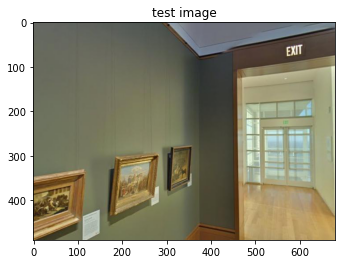

[0.0072508  0.00741608 0.00727711 ... 0.0084353  0.00882373 0.00806636]
[0.00750205 0.00811841 0.03939436 ... 0.00972486 0.         0.        ]
image names: b'IMG3375_4.jpg' scores: 0.009935443289577961
image names: b'IMG3429_3.jpg' scores: 0.009659316390752792
image names: b'IMG3893_3.jpg' scores: 0.009607241488993168
top 3 images in order are: [b'IMG3375_4.jpg', b'IMG3429_3.jpg', b'IMG3893_3.jpg']


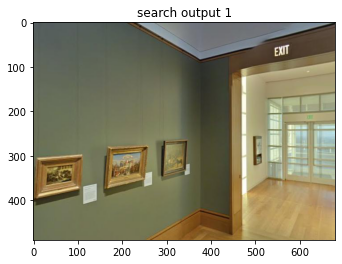

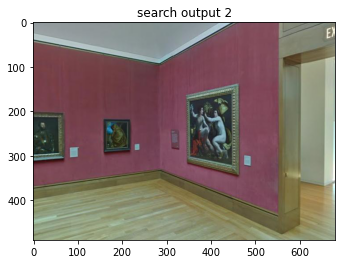

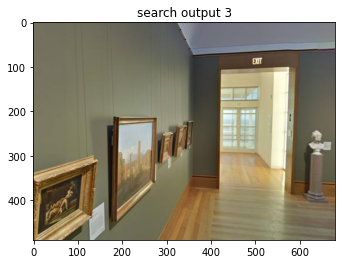

In [7]:
model_path = 'models/featureNet2_ResNet152V2.h5'
features, training_names = load_model(model_path)

# read and show image
sample_test = 'test/IMG4287_3.jpg'
sample_img = matplotlib.image.imread(sample_test)
plt.title("test image")
plt.imshow(sample_img)
plt.show()

# load model class
model = FeatureExtractionNet()

# extract features
test_features = model.extract_feature(sample_test)
scores = np.dot(test_features,np.transpose(features))/(np.linalg.norm(test_features)*np.linalg.norm(np.transpose(features)))
print(scores)
ranks = np.argsort(scores)[::-1]
rank_score = scores[ranks]
print(test_features)
top_k = 3
imlist = []
for i, index in enumerate(ranks[0:top_k]):
    imlist.append(training_names[index])
    print("image names: " + str(training_names[index]) + " scores: {}".format(rank_score[i]))
print("top {} images in order are: ".format(top_k) + str(imlist))

for i, im in enumerate(imlist):
    image = matplotlib.image.imread(train_dir + "/" + str(im, 'utf-8'))
    plt.title("search output {}".format((i + 1)))
    plt.imshow(image)
    plt.show()

In [8]:
train_datalabels

,id,x,y
0,IMG2744_1,-9.380678,3.58272
1,IMG2744_2,-9.380678,3.58272
2,IMG2744_3,-9.380678,3.58272
3,IMG2744_4,-9.380678,3.58272
4,IMG2744_5,-9.380678,3.58272
...,...,...,...
7495,IMG4243_1,-4.680678,35.18272
7496,IMG4243_2,-4.680678,35.18272
7497,IMG4243_3,-4.680678,35.18272
7498,IMG4243_4,-4.680678,35.18272


In [9]:
train_datalabels.loc[train_datalabels['id'] == 'IMG2744_1']

,id,x,y
0,IMG2744_1,-9.380678,3.58272


In [10]:
os.path.splitext('IMG2744_1.jpg')[0]

'IMG2744_1'

In [11]:
from collections import Counter
def predict_from_image(test_names, model, train_features, training_names, train_datalabels, k=3, avg = False):
    test_features = model.extract_feature('test/'+test_names+'.jpg')
    scores = np.dot(test_features, np.transpose(train_features))/(np.linalg.norm(test_features)*np.linalg.norm(np.transpose(train_features)))
    ranks = np.argsort(scores)[::-1]
    rank_score = scores[ranks]
    imlist = []
    for i, index in enumerate(ranks[0:k]):
        imlist.append(str(training_names[index], 'utf-8'))
    test_x = []
    test_y = []
    for img in imlist:
        instance = train_datalabels.loc[train_datalabels['id'] == img.split('.')[0]] 
        test_x.append(float(instance['x']))
        test_y.append(float(instance['y']))
    count_x = Counter(test_x)
    count_y = Counter(test_y)
    if avg == False:
        return max(count_x, key = count_x.get),max(count_y, key = count_y.get)
    else:
        return sum(test_x)/len(test_x),sum(test_y)/len(test_y) 



In [12]:
test_x, test_y = [],[]
model = FeatureExtractionNet()
model_path = 'models/featureNet2_ResNet152V2.h5'
features, training_names = load_model(model_path)
k = 3

for i in tqdm(range(len(test_images))):
    #print('testing {}/{} images'.format((i+1), len(test_images)))
    t_name = test_images['id'][i]
    pred_x, pred_y = predict_from_image(t_name,model, features, training_names, train_datalabels, k=3, avg = False)
    test_x.append(pred_x)
    test_y.append(pred_y)
    

100%|██████████████████████████████████████████████████████████████████████████████| 1200/1200 [14:32<00:00,  1.38it/s]


In [13]:
test_images['x'] = np.array(test_x)
test_images['y'] = np.array(test_y)
test_images
test_images.to_csv('result6.csv', index=False)